In [2]:
import numpy as np

In [1]:
import matplotlib.pyplot as plt

In [3]:
# LaTeX rendering in graphs
try:
    plt.rc('text', usetex=True)
except:
    pass

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [4]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [5]:
%reload_ext autoreload
%autoreload 2

In [11]:
import models
import utils

# Vanilla RNN

Run next cell to show the completed code.

In [7]:
%psource models.RNN

# Gated Recurrent Unit

Run next cell to show the completed code.

In [8]:
%psource models.GRU

# Multi-headed attention (transformer)

Run next cell to show the completed code.

In [10]:
%psource models.MultiHeadedAttention

# Problem 4

## Model comparison

In [53]:
experiments = {
    '1-gru': {
        'name': 'GRU',
        'folder': 'experiments/GRU_SGD_LR_SCHEDULE_save_dir_experiments_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0/'
    },
    '1-rnn': {
        'name': 'RNN',
        'folder': 'experiments/RNN_ADAM_save_dir_experiments_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0/'
    },
    '1-transformer': {
        'name': 'Transformer',
        'folder': 'experiments/TRANSFORMER_SGD_LR_SCHEDULE_save_dir_experiments_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=0.9_save_best_0/'
    },
}

In [24]:
learning_curves = np.load('experiments/GRU_SGD_LR_SCHEDULE_save_dir_experiments_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0/learning_curves.npy')

In [56]:
def get_curves(folder):
    return np.load(folder + 'learning_curves.npy').item()

In [57]:
lc = get_curves(experiments['1-gru']['folder'])

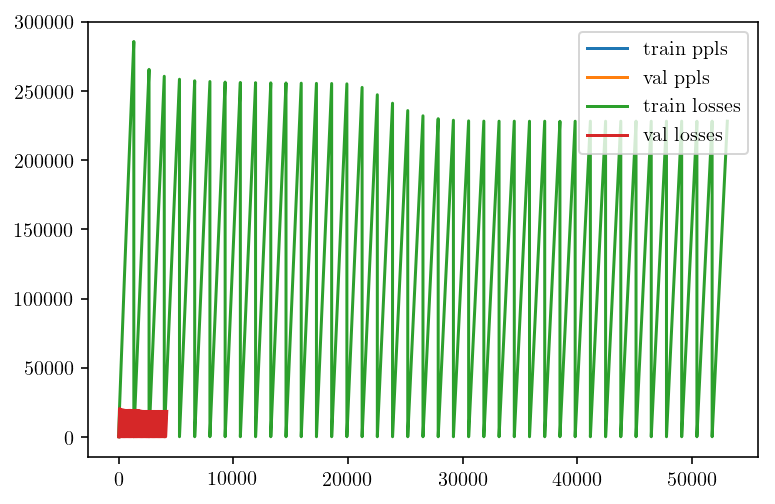

In [58]:
for key, value in lc.items():
    plt.plot(value, label=key.replace('_', ' '))
plt.legend()

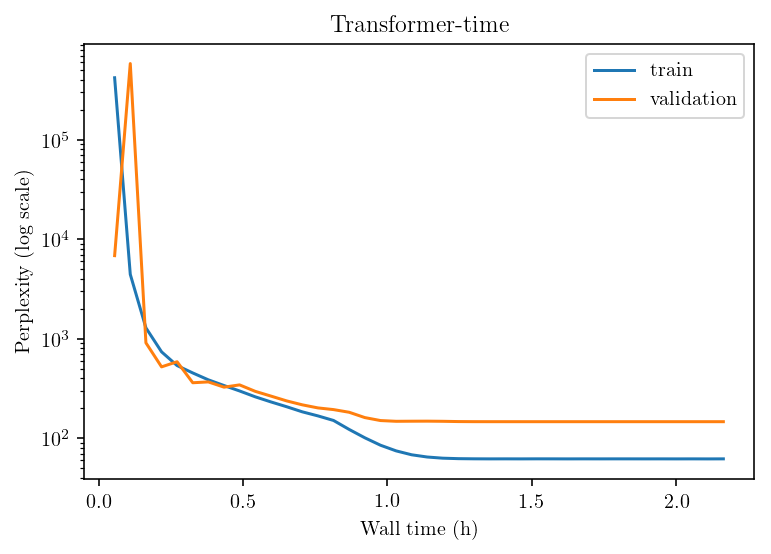

In [73]:
utils.plot_ppl(**experiments['1-transformer'], log_scale=True, time=True)

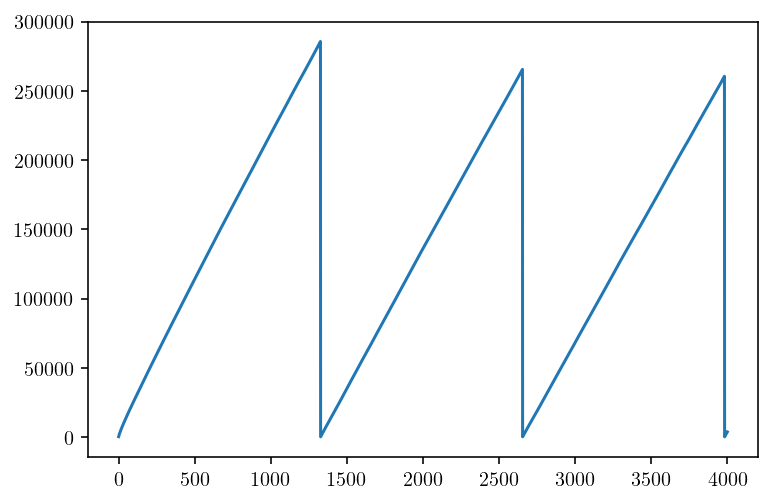

In [68]:
plt.plot(lc['train_losses'][:4000], label='train')
plt.twinx